<a href="https://colab.research.google.com/github/botkin92/Introduction_to_Neural_Networks/blob/lesson_4/HW_esson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример создания сверточных и пуллинг слоев

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D

In [2]:
# from tensorflow.keras.datasets import mnist
# from keras.utils import np_utils
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import models, layers
# from tensorflow import keras

# Более сложная нейронная сеть (реализация из методички)

In [41]:
from tensorflow import keras 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
import os

In [4]:
# установка параметров нейросети
batch_size = 128
num_classes = 10
epochs = 5
data_augmentation = True
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_cifar10_trained_model.h5'

In [5]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [6]:
def plot_images(images, labels):
  fig, axes = plt.subplots(1, len(images), figsize = (10, 5))
  for im, l, ax in zip(images, labels, axes):
    ax.imshow(im.reshape(32, 32, 3))
    ax.set_title(l.argmax())

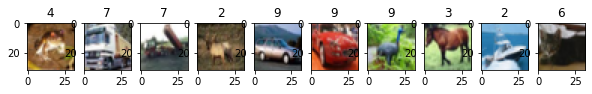

In [7]:
plot_images(x_train[:10], y_train[10:20])

In [8]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [14]:
# datagen[0]

TypeError: ignored

In [15]:
dg = datagen.flow(x_train[:5], batch_size=1)

In [16]:
dg[0]

array([[[[0.9967018 , 0.9967018 , 0.9967018 ],
         [0.9967018 , 0.9967018 , 0.9967018 ],
         [0.9967018 , 0.9967018 , 0.9967018 ],
         ...,
         [0.9967018 , 0.9967018 , 0.9967018 ],
         [0.9967018 , 0.9967018 , 0.9967018 ],
         [0.9997492 , 0.9997492 , 0.9997492 ]],

        [[0.99937665, 0.99937665, 0.99937665],
         [0.99937665, 0.99937665, 0.99937665],
         [0.99937665, 0.99937665, 0.99937665],
         ...,
         [0.99937665, 0.99937665, 0.99937665],
         [0.99937665, 0.99937665, 0.99937665],
         [0.9999526 , 0.9999526 , 0.9999526 ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.31247878, 0.3360082 , 0.32816505],
         [0.30482376, 0.32835317, 0.321086  ]

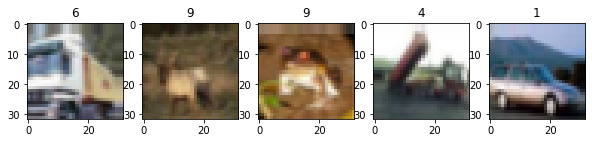

In [17]:
plot_images(dg, y_train[:5])

In [18]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [19]:
# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [20]:
# запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


391/391 [==============================] - 35s 58ms/step - loss: 2.0293 - accuracy: 0.2508 - val_loss: 1.7470 - val_accuracy: 0.3790
Epoch 2/5
391/391 [==============================] - 22s 56ms/step - loss: 1.7597 - accuracy: 0.3629 - val_loss: 1.6209 - val_accuracy: 0.4346
Epoch 3/5
391/391 [==============================] - 23s 59ms/step - loss: 1.6567 - accuracy: 0.3961 - val_loss: 1.4982 - val_accuracy: 0.4604
Epoch 4/5
391/391 [==============================] - 22s 57ms/step - loss: 1.5826 - accuracy: 0.4247 - val_loss: 1.4424 - val_accuracy: 0.4730
Epoch 5/5
391/391 [==============================] - 22s 57ms/step - loss: 1.5243 - accuracy: 0.4483 - val_loss: 1.4159 - val_accuracy: 0.4895


In [ ]:
# # сохранение модели и весов
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('сохранить обученную модель как %s ' % model_path)


сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 


In [21]:

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.4159 - accuracy: 0.4895
Test loss: 1.4158560037612915
Test accuracy: 0.4894999861717224


# Практическое задание

Попробуем улучшить точность модели изменяя параметры поочередно:  
1. Conv2D: kernel_size: (3, 3), (4, 4); padding: "same"/off
2. Pooling: метод: avg/max; poll_size: (2, 2)/(3, 3)
3. Dropout: p: 0.25/0.2, 0.5/0.3

In [54]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))

# полносвязные слои нейронной сети
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# запуск data augmentation через fit_generator
model_2.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

# проверка работы обученной модели
scores = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


391/391 [==============================] - 24s 59ms/step - loss: 1.9680 - accuracy: 0.2799 - val_loss: 1.7190 - val_accuracy: 0.3929
Epoch 2/5
391/391 [==============================] - 22s 56ms/step - loss: 1.7042 - accuracy: 0.3761 - val_loss: 1.5779 - val_accuracy: 0.4267
Epoch 3/5
391/391 [==============================] - 22s 57ms/step - loss: 1.5958 - accuracy: 0.4189 - val_loss: 1.4305 - val_accuracy: 0.4919
Epoch 4/5
391/391 [==============================] - 22s 57ms/step - loss: 1.5207 - accuracy: 0.4492 - val_loss: 1.4329 - val_accuracy: 0.4784
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.3306 - accuracy: 0.5205
Test loss: 1.330571174621582
Test accuracy: 0.5205000042915344


**Увеличение размера ядра улучшила точность с 0.489 до 0.525:**  

model(kernel_size: (4, 4); padding: "same"; Pooling: max; poll_size: (2, 2); Dropout: p: 0.25, 0.5)   

Test loss: 1.3219722509384155  
Test accuracy: 0.5249999761581421

**Отсутствие отступов cнизило незначительно точность с 0.489 до 0.483**   

model(kernel_size: (3, 3); padding: off; Pooling: max; poll_size: (2, 2); Dropout: p: 0.25, 0.5)   

Test loss: 1.4166829586029053  
Test accuracy: 0.4832000136375427

**Применение AveragePooling2D также cнизила точность с 0.489 до 0.475**   

model(kernel_size: (3, 3); padding: "same"; Pooling: avg; poll_size: (2, 2); Dropout: p: 0.25, 0.5)   

Test loss: 1.4373128414154053  
Test accuracy: 0.47540000081062317

**Размер ядра pooling'а cнизила точность с 0.489 до 0.393**   

model(kernel_size: (3, 3); padding: "same"; Pooling: max; poll_size: (3, 3); Dropout: p: 0.25, 0.5)   

Test loss: 1.6702381372451782  
Test accuracy: 0.39340001344680786

**Снижение вероятности исключения нейронов (Dropout) улучшила точность с 0.489 до 0.52**   

model(kernel_size: (3, 3); padding: "same"; Pooling: max; poll_size: (3, 3); Dropout: p: 0.25, 0.5)   

Test loss: 1.330571174621582  
Test accuracy: 0.5205000042915344

Соберем итоговую модель, с параметрами которые улучшили точность:

In [55]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (4, 4), padding='same', input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (4, 4)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(64, (4, 4), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (4, 4)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

# полносвязные слои нейронной сети
model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# запуск data augmentation через fit_generator
model_3.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

# проверка работы обученной модели
scores = model_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


391/391 [==============================] - 26s 63ms/step - loss: 1.9478 - accuracy: 0.2820 - val_loss: 1.7210 - val_accuracy: 0.3836
Epoch 2/5
391/391 [==============================] - 23s 60ms/step - loss: 1.7032 - accuracy: 0.3782 - val_loss: 1.5427 - val_accuracy: 0.4382
Epoch 3/5
391/391 [==============================] - 23s 59ms/step - loss: 1.5881 - accuracy: 0.4181 - val_loss: 1.4251 - val_accuracy: 0.4804
Epoch 4/5
391/391 [==============================] - 24s 61ms/step - loss: 1.5166 - accuracy: 0.4452 - val_loss: 1.3953 - val_accuracy: 0.4995
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.3324 - accuracy: 0.5126
Test loss: 1.3323818445205688
Test accuracy: 0.5126000046730042


При одновременном изменении kernel_size (4, 4) и Dropout точность получилось несколько меньше, чем при изменении только размера ядра. Попробуем еще увеличить kernel_size до (4, 4) и добавить слой для полносвязной сети.  
Итоговая модель:

In [60]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (5, 5), padding='same', input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (5, 5)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(64, (5, 5), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (5, 5)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

# полносвязные слои нейронной сети
model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# запуск data augmentation через fit_generator
model_3.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test))

# проверка работы обученной модели
scores = model_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


391/391 [==============================] - 25s 60ms/step - loss: 1.9598 - accuracy: 0.2758 - val_loss: 1.7244 - val_accuracy: 0.3783
Epoch 2/5
391/391 [==============================] - 24s 61ms/step - loss: 1.7052 - accuracy: 0.3802 - val_loss: 1.5262 - val_accuracy: 0.4353
Epoch 3/5
391/391 [==============================] - 23s 59ms/step - loss: 1.5836 - accuracy: 0.4239 - val_loss: 1.6185 - val_accuracy: 0.4270
Epoch 4/5
391/391 [==============================] - 23s 59ms/step - loss: 1.4988 - accuracy: 0.4579 - val_loss: 1.3405 - val_accuracy: 0.5096
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.3032 - accuracy: 0.5342
Test loss: 1.3032243251800537
Test accuracy: 0.5342000126838684
